In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/entire-world-educational-data/global_education_data.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns 



In [3]:
df = pd.read_csv("/kaggle/input/entire-world-educational-data/global_education_data.csv",encoding='latin1')
df.head(-3)

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Uruguay,32.522779,55.765835,2,1,3,3,1,0,15,...,59,68,58,49,99,99,13.86,108.5,63.1,8.73
195,Uzbekistan,41.377491,64.585262,53,55,0,2,0,2,14,...,0,0,0,0,100,100,23.30,104.2,10.1,5.92
196,Vanuatu,15.376706,166.959158,38,38,8,7,2,4,41,...,0,0,0,0,96,97,29.60,109.3,4.7,4.39
197,Venezuela,6.423750,66.589730,14,14,10,10,15,13,28,...,0,0,0,0,0,0,17.88,97.2,79.3,8.80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

In [5]:
df.describe()

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,25.081422,55.166928,19.658416,19.282178,5.282178,5.569307,8.707921,8.831683,20.292079,19.975248,...,10.717822,10.376238,25.787129,24.450495,35.801980,35.084158,18.914010,94.942574,34.392574,6.000000
std,16.813639,45.976287,25.007604,25.171147,9.396442,10.383092,13.258203,14.724717,21.485592,23.140376,...,24.866101,22.484423,33.181384,31.965467,45.535186,45.249643,10.828184,29.769338,29.978206,5.273136
min,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.685062,18.665678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,21.207861,43.518091,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,39.901792,77.684945,31.000000,30.000000,6.000000,6.750000,12.750000,10.750000,32.750000,30.000000,...,0.000000,0.000000,56.750000,50.750000,94.000000,96.750000,27.692500,107.300000,59.975000,8.655000
max,64.963051,178.065032,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,...,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000


In [6]:
education_data = df

In [7]:
education_data

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela,6.423750,66.589730,14,14,10,10,15,13,28,...,0,0,0,0,0,0,17.88,97.2,79.3,8.80
198,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,...,55,51,86,81,98,98,16.75,110.6,28.5,2.01
199,Yemen,15.552727,48.516388,96,96,10,21,23,34,46,...,0,0,0,0,0,0,30.45,93.6,10.2,12.91
200,Zambia,13.133897,27.849332,0,0,17,13,0,0,0,...,0,0,5,2,93,92,36.19,98.7,4.1,11.43


In [8]:
import numpy as np

# Function to categorize countries into continents based on latitude and longitude
def categorize_continent(row):
    lat, lon = row['Latitude'], row['Longitude']
    
    if (lat >= -55.0) and (lat <= 70.0) and (lon >= -25.0) and (lon <= 60.0):
        return 'Europe'
    elif (lat >= 12.0) and (lat <= 55.0) and (lon >= 60.0) and (lon <= 180.0):
        return 'Asia'
    elif (lat >= -35.0) and (lat <= 35.0) and (lon >= -20.0) and (lon <= 55.0):
        return 'Africa'
    elif (lat >= 30.0) and (lat <= 70.0) and (lon >= -170.0) and (lon <= -25.0):
        return 'North America'
    elif (lat >= -60.0) and (lat <= 20.0) and (lon >= -90.0) and (lon <= -30.0):
        return 'South America'
    elif (lat >= -90.0) and (lat <= -60.0) and (lon >= -180.0) and (lon <= 180.0):
        return 'Antarctica'
    elif (lat >= -55.0) and (lat <= 30.0) and (lon >= 100.0) and (lon <= 180.0):
        return 'Oceania'
    else:
        return 'Others'

In [9]:
# Correcting the column name for latitude (removing the trailing space)
education_data = education_data.rename(columns={"Latitude ": "Latitude"})

# Re-applying the function to categorize countries into continents
education_data['Continent'] = education_data.apply(categorize_continent, axis=1)

# Display the first few rows to confirm the categorization
education_data[['Countries and areas', 'Latitude', 'Longitude', 'Continent']].head()


,Countries and areas,Latitude,Longitude,Continent
0,Afghanistan,33.939110,67.709953,Asia
1,Albania,41.153332,20.168331,Europe
2,Algeria,28.033886,1.659626,Europe
3,Andorra,42.506285,1.521801,Europe
4,Angola,11.202692,17.873887,Europe


In [10]:
# Updated function for more precise continent categorization
def categorize_continent_precise(row):
    lat, lon = row['Latitude'], row['Longitude']
    
    # Europe and Asia boundary adjustment
    if (lat >= 35.0) and (lat <= 70.0) and (lon >= -25.0) and (lon <= 40.0):
        return 'Europe'
    elif (lat >= 12.0) and (lat <= 55.0) and (lon >= 40.0) and (lon <= 180.0):
        return 'Asia'
    # Africa adjustment
    elif (lat >= -35.0) and (lat <= 37.0) and (lon >= -20.0) and (lon <= 55.0):
        return 'Africa'
    # North America, South America, Oceania, and Antarctica remain unchanged
    elif (lat >= 30.0) and (lat <= 70.0) and (lon >= -170.0) and (lon <= -25.0):
        return 'North America'
    elif (lat >= -60.0) and (lat <= 20.0) and (lon >= -90.0) and (lon <= -30.0):
        return 'South America'
    elif (lat >= -90.0) and (lat <= -60.0) and (lon >= -180.0) and (lon <= 180.0):
        return 'Antarctica'
    elif (lat >= -55.0) and (lat <= 30.0) and (lon >= 100.0) and (lon <= 180.0):
        return 'Oceania'
    else:
        return 'Others'

# Apply the updated function to the dataset
education_data['Continent'] = education_data.apply(categorize_continent_precise, axis=1)

# Display the first few rows to confirm the updated categorization
education_data[['Countries and areas', 'Latitude', 'Longitude', 'Continent']].head()


,Countries and areas,Latitude,Longitude,Continent
0,Afghanistan,33.939110,67.709953,Asia
1,Albania,41.153332,20.168331,Europe
2,Algeria,28.033886,1.659626,Africa
3,Andorra,42.506285,1.521801,Europe
4,Angola,11.202692,17.873887,Africa


In [11]:
education_data["Continent"].value_counts()

Continent
Asia       73
Africa     56
Europe     45
Oceania    14
Others     14
Name: count, dtype: int64

In [12]:
# Selecting the relevant columns for analysis
relevant_columns = [
    'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
    'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
    'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
    'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
    'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math',
    'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
    'Birth_Rate', 'Gross_Primary_Education_Enrollment',
    'Gross_Tertiary_Education_Enrollment', 'Unemployment_Rate'
]



In [13]:
#Calculating the mean values of each indicator for each continent
mean_values_by_continent = education_data.groupby('Continent')[relevant_columns].mean()


mean_values_by_continent = mean_values_by_continent[relevant_columns]

mean_values_by_continent

,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
Continent,,,,,,,,,,,,,,,,,,
Africa,36.178571,36.321429,11.821429,13.000000,17.071429,18.732143,31.392857,33.642857,3.660714,3.250000,4.464286,4.125000,42.089286,39.625000,30.620000,96.496429,13.941071,7.861607
Asia,17.178082,16.273973,2.602740,2.506849,6.561644,6.095890,18.260274,16.972603,13.000000,12.273973,18.780822,17.397260,34.356164,34.178082,16.686986,96.397260,34.767123,5.349315
Europe,7.800000,8.200000,2.133333,2.000000,2.511111,2.466667,9.488889,9.266667,14.866667,15.488889,64.577778,62.933333,24.333333,24.377778,9.400222,92.282222,60.240000,5.967111
Oceania,17.642857,16.214286,5.000000,5.714286,10.285714,9.285714,25.785714,22.357143,0.000000,0.000000,15.785714,16.642857,34.214286,34.428571,17.227857,81.521429,22.121429,2.059286
Others,6.642857,5.500000,3.500000,3.142857,4.785714,3.500000,15.714286,13.000000,24.428571,22.928571,32.928571,26.642857,56.642857,56.714286,15.968571,103.114286,43.435714,5.992857


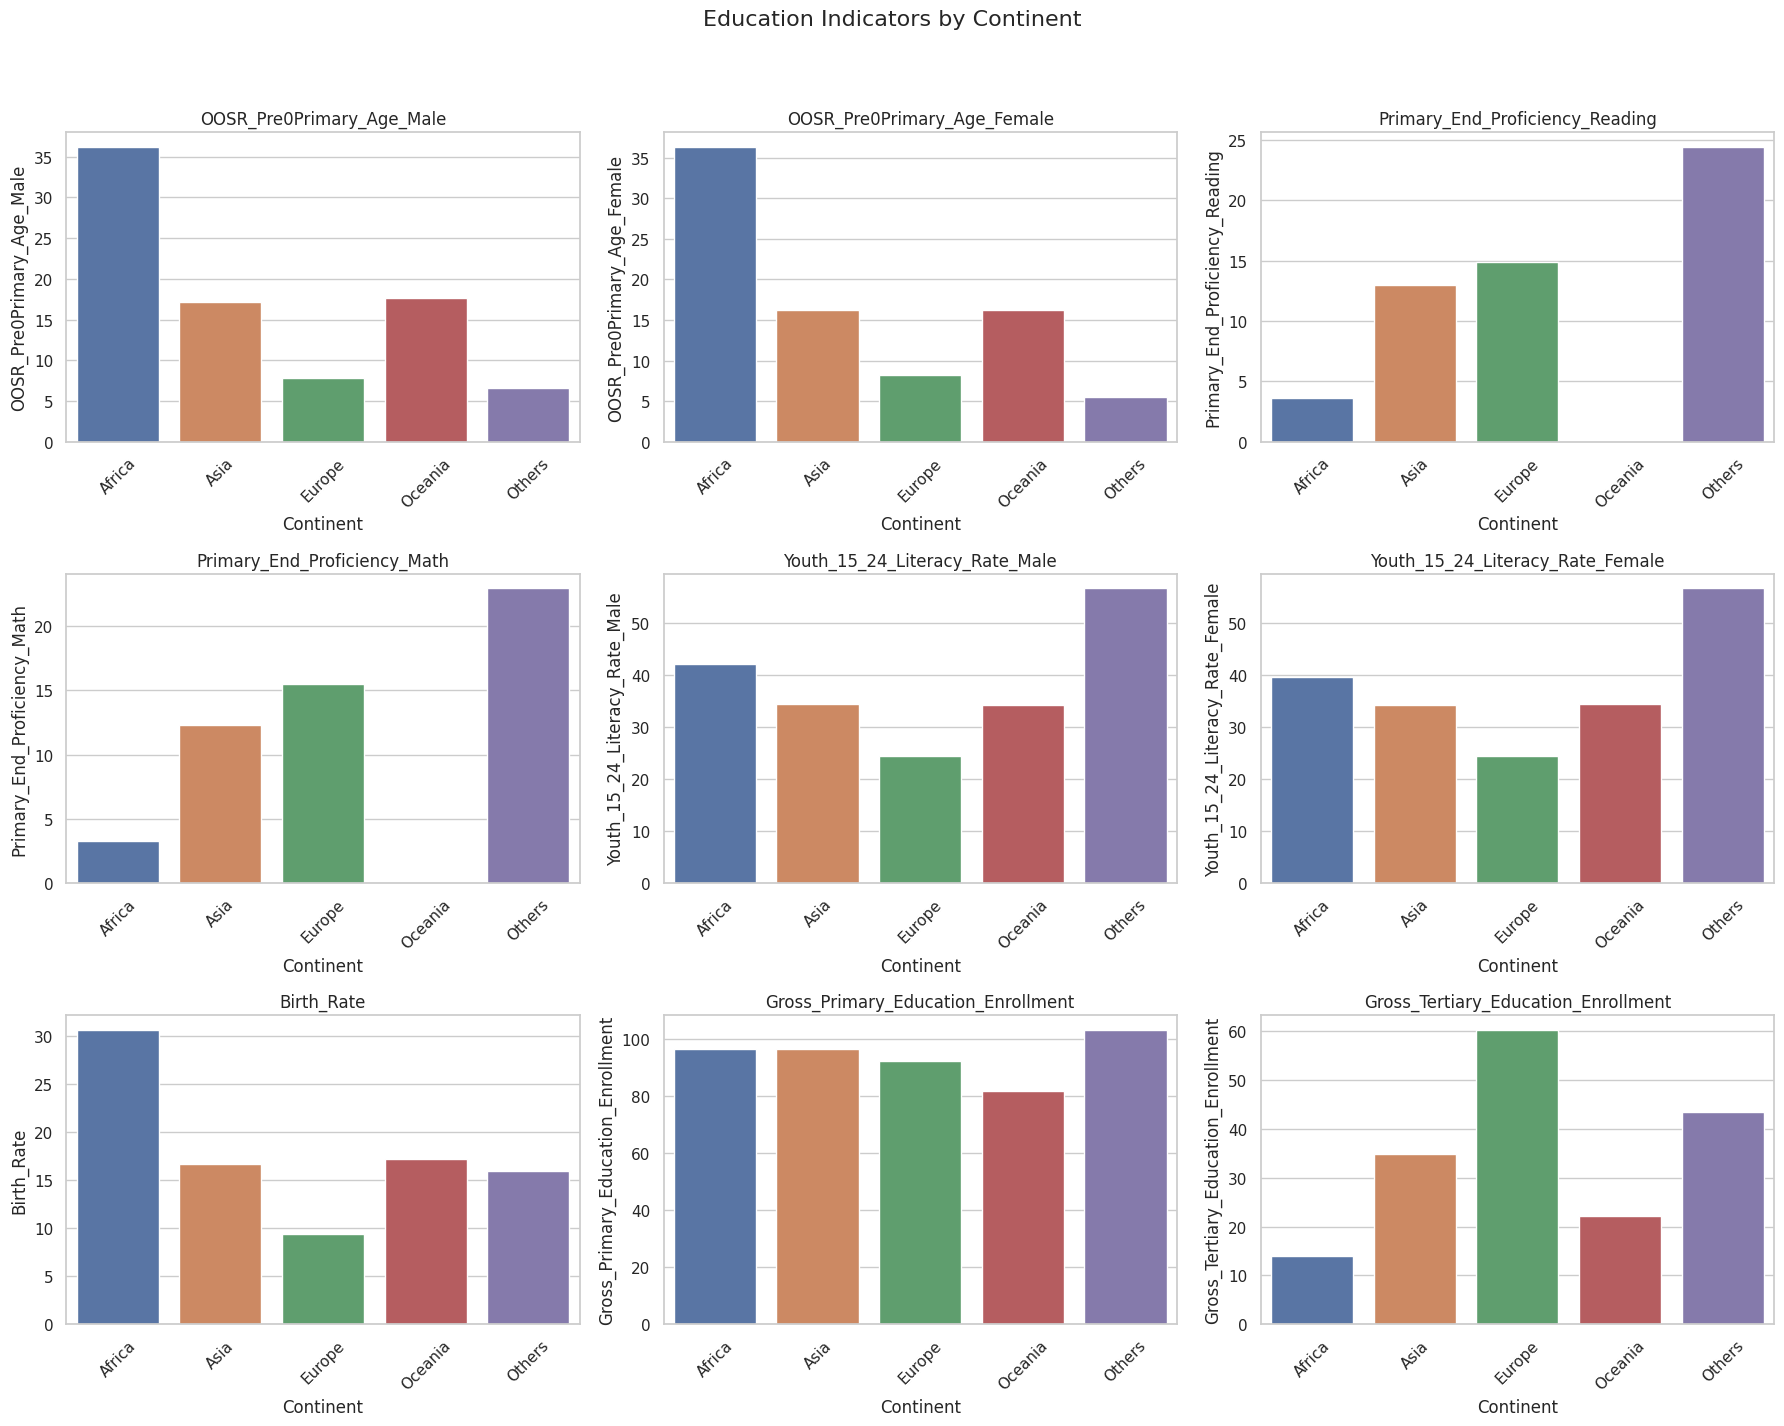

In [14]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Selecting a subset of columns for visualization
columns_for_visualization = [
    'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
    'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
    'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
    'Birth_Rate', 'Gross_Primary_Education_Enrollment',
    'Gross_Tertiary_Education_Enrollment'
]
data_for_visualization = mean_values_by_continent[columns_for_visualization]

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Education Indicators by Continent', fontsize=16)

for i, column in enumerate(columns_for_visualization):
    row = i // 3
    col = i % 3
    sns.barplot(x=data_for_visualization.index, y=data_for_visualization[column], ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].set_xticklabels(data_for_visualization.index, rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


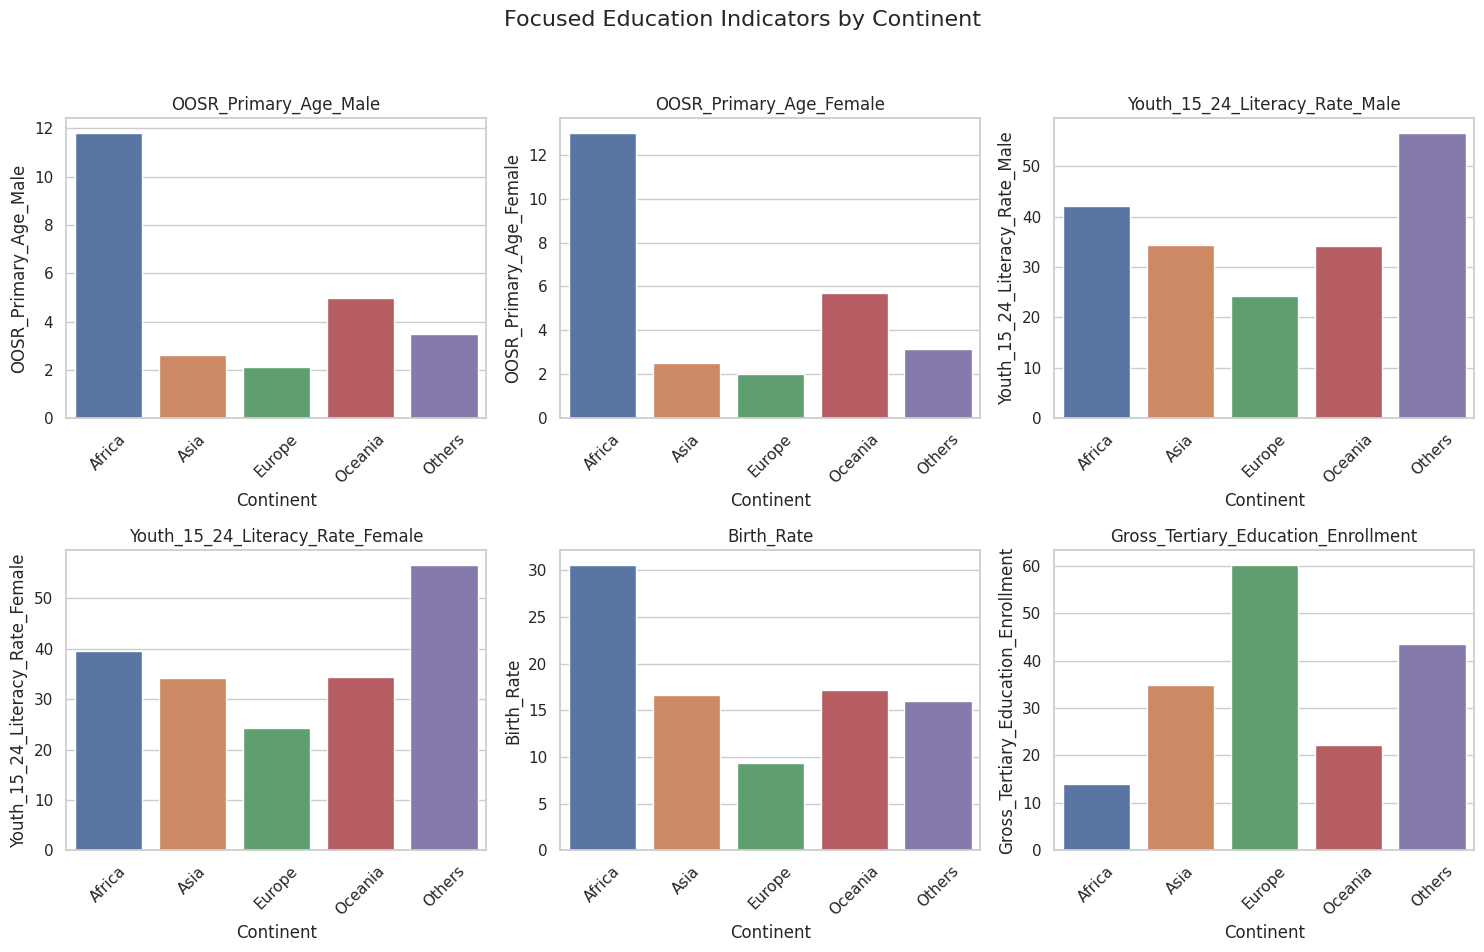

In [15]:
# Selecting a subset of columns for focused visualization
focused_columns = [
    'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
    'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
    'Birth_Rate', 'Gross_Tertiary_Education_Enrollment'
]
focused_data_for_visualization = mean_values_by_continent[focused_columns]

# Plotting focused indicators
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Focused Education Indicators by Continent', fontsize=16)

for i, column in enumerate(focused_columns):
    row = i // 3
    col = i % 3
    sns.barplot(x=focused_data_for_visualization.index, y=focused_data_for_visualization[column], ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].set_xticklabels(focused_data_for_visualization.index, rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


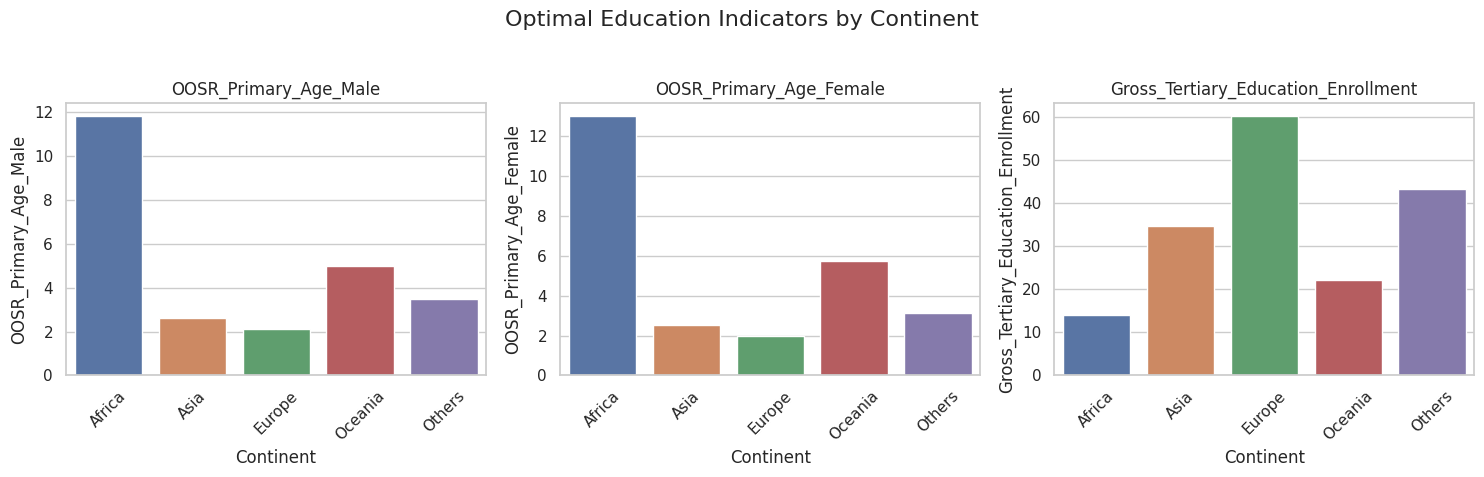

In [16]:
# Selecting a focused subset of columns for optimal visualization
optimal_columns = [
    'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
    'Gross_Tertiary_Education_Enrollment'
]
optimal_data_for_visualization = mean_values_by_continent[optimal_columns]

# Plotting optimal indicators
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Optimal Education Indicators by Continent', fontsize=16)

for i, column in enumerate(optimal_columns):
    sns.barplot(x=optimal_data_for_visualization.index, y=optimal_data_for_visualization[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xticklabels(optimal_data_for_visualization.index, rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [17]:
# Extracting Gross_Primary_Education_Enrollment and Gross_Tertiary_Education_Enrollment for each country
education_enrollment_data = education_data[['Countries and areas', 'Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment']]

# Displaying the first few rows of the data
education_enrollment_data.head()


,Countries and areas,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment
0,Afghanistan,104.0,9.7
1,Albania,107.0,55.0
2,Algeria,109.9,51.4
3,Andorra,106.4,0.0
4,Angola,113.5,9.3


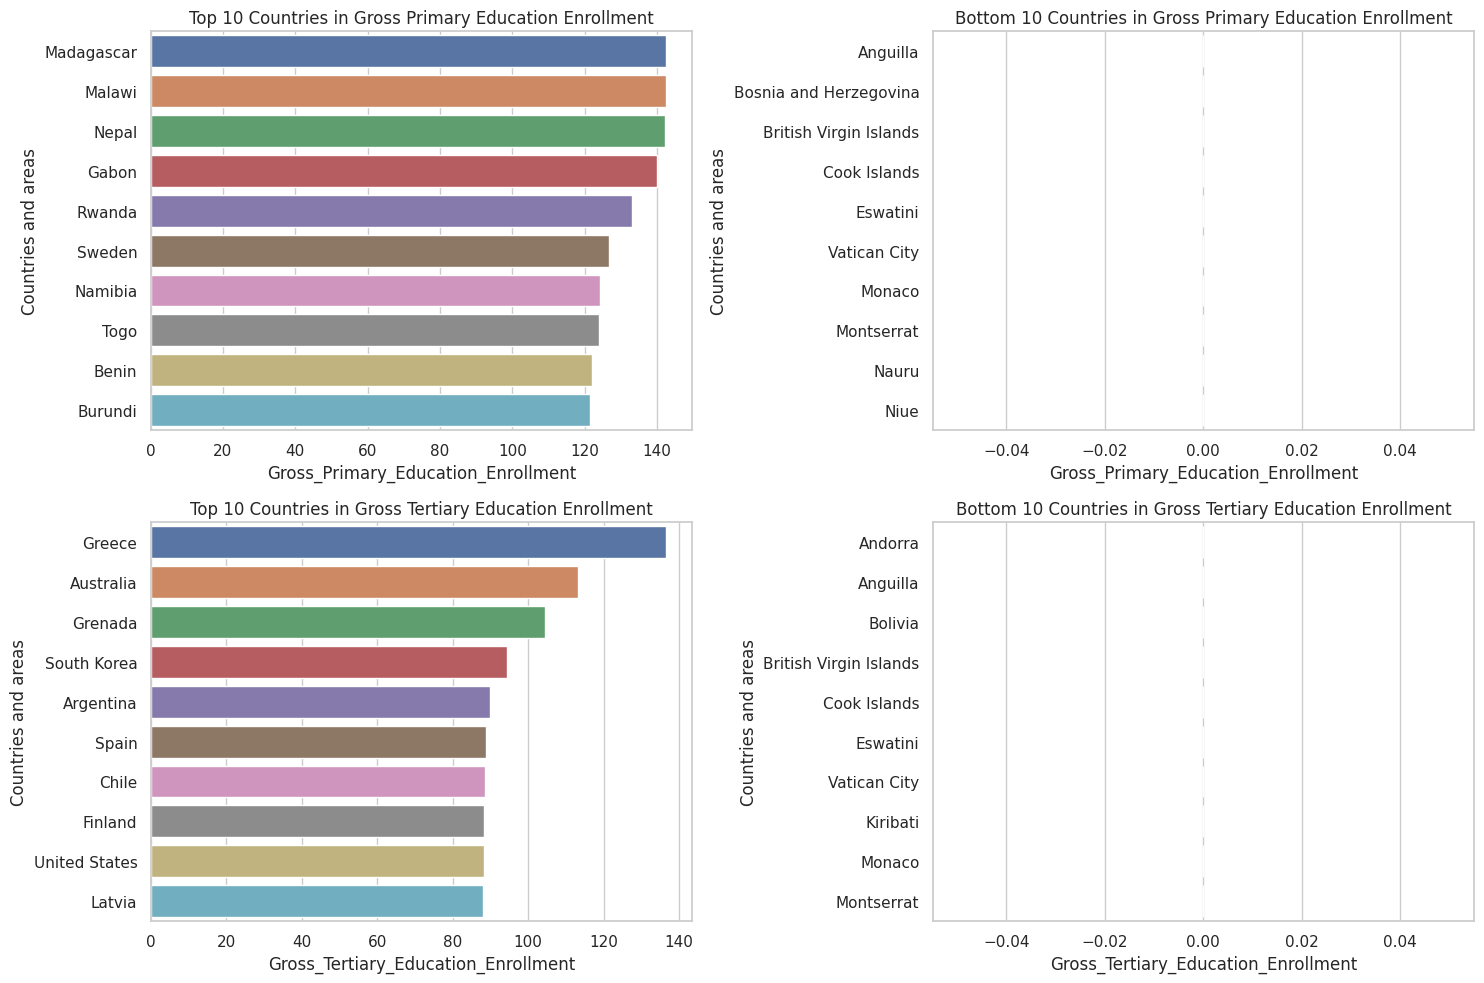

In [18]:
# Sorting the data for Gross_Primary_Education_Enrollment and selecting top and bottom 10 countries
top_10_primary = education_enrollment_data.nlargest(10, 'Gross_Primary_Education_Enrollment')
bottom_10_primary = education_enrollment_data.nsmallest(10, 'Gross_Primary_Education_Enrollment')

# Sorting the data for Gross_Tertiary_Education_Enrollment and selecting top and bottom 10 countries
top_10_tertiary = education_enrollment_data.nlargest(10, 'Gross_Tertiary_Education_Enrollment')
bottom_10_tertiary = education_enrollment_data.nsmallest(10, 'Gross_Tertiary_Education_Enrollment')

# Plotting the data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Top 10 Primary Education Enrollment
sns.barplot(x='Gross_Primary_Education_Enrollment', y='Countries and areas', data=top_10_primary, ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Countries in Gross Primary Education Enrollment')

# Bottom 10 Primary Education Enrollment
sns.barplot(x='Gross_Primary_Education_Enrollment', y='Countries and areas', data=bottom_10_primary, ax=axes[0, 1])
axes[0, 1].set_title('Bottom 10 Countries in Gross Primary Education Enrollment')

# Top 10 Tertiary Education Enrollment
sns.barplot(x='Gross_Tertiary_Education_Enrollment', y='Countries and areas', data=top_10_tertiary, ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Countries in Gross Tertiary Education Enrollment')

# Bottom 10 Tertiary Education Enrollment
sns.barplot(x='Gross_Tertiary_Education_Enrollment', y='Countries and areas', data=bottom_10_tertiary, ax=axes[1, 1])
axes[1, 1].set_title('Bottom 10 Countries in Gross Tertiary Education Enrollment')

plt.tight_layout()
plt.show()
